In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def paraboloid(x):
  return x[0]**2 + x[1]**2

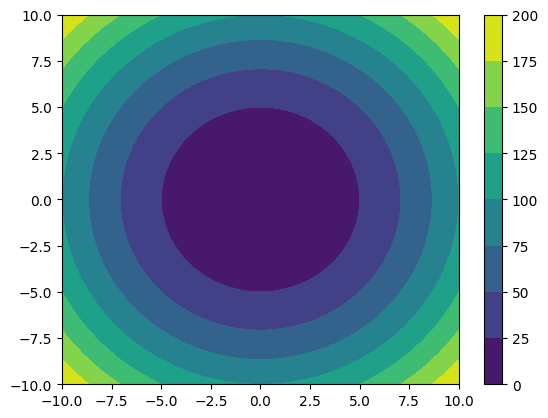

In [3]:
def plot_function(f):  
  xs, ys = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100), indexing='ij')
  zs = f(np.array([xs, ys]))
  plt.contourf(xs, ys, zs)
  plt.colorbar()

plot_function(paraboloid)

In [4]:
def find_zero(f, x):
  lo = -1e3
  hi = 1e3
  for _ in range(1000):
    mid = (lo + hi) / 2
    if f([x, mid]) > 0:
      hi = mid
    else:
      lo = mid
  return [x, lo]

In [5]:
def constraint1(x):
  return x[0] + x[1] - 5

def constraint2(x):
  return (0.5 * x[0]) + x[1] - 5

In [6]:
x0 = [400, 700]

cons1 = {'type': 'ineq', 'fun': constraint1}
cons2 = {'type': 'ineq', 'fun': constraint2}

result_without_constraints = optimize.minimize(paraboloid, x0)
result_constraints = optimize.minimize(paraboloid, x0, constraints=[cons1, cons2])

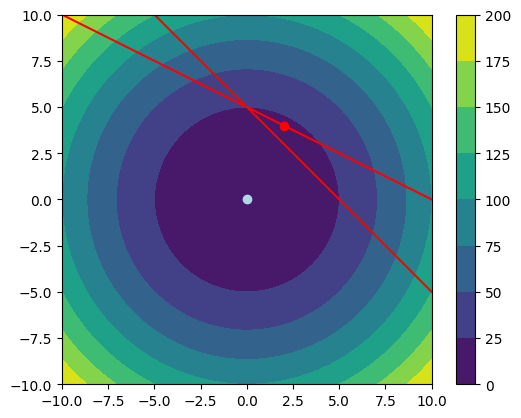

In [7]:
_, ax = plt.subplots()

ax.set_box_aspect(1)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plot_function(paraboloid)

plt.scatter(result_constraints.x[0], result_constraints.x[1], color='red')
plt.scatter(result_without_constraints.x[0], result_without_constraints.x[1], color='lightblue')

def plot_segment(p, q):
  endpoints = np.array([p, q])
  plt.plot(endpoints[:, 0], endpoints[:, 1], color='red')

plot_segment(find_zero(constraint1, -20), find_zero(constraint1, 20))
plot_segment(find_zero(constraint2, -20), find_zero(constraint2, 20))